In [5]:
import pandas as pd
pd.options.display.max_columns = 50

In [34]:
### extract headers as they contain white spaces
colnames = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv", header = None, nrows=1)
header = []
for i in range(0,31):
    header.append(colnames.iloc[0, i].strip())

### read data set
cancer = pd.read_csv("data/breast-cancer-diagnostic.shuf.lrn.csv", header = None, names = header, skiprows=1, index_col=False)

In [36]:
### Overview
print(header)
print(cancer.head())

['ID', 'class', 'radiusMean', 'textureMean', 'perimeterMean', 'areaMean', 'smoothnessMean', 'compactnessMean', 'concavityMean', 'concavePointsMean', 'symmetryMean', 'fractalDimensionMean', 'radiusStdErr', 'textureStdErr', 'perimeterStdErr', 'areaStdErr', 'smoothnessStdErr', 'compactnessStdErr', 'concavityStdErr', 'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr', 'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst', 'smoothnessWorst', 'compactnessWorst', 'concavityWorst', 'concavePointsWorst', 'symmetryWorst']
        ID class  radiusMean  textureMean  perimeterMean  areaMean  \
0   868682     B       11.43        15.39          73.06     399.8   
1   881972     M       17.05        19.08         113.40     895.0   
2   901315     B       10.57        20.22          70.15     338.3   
3  9112367     B       13.21        25.25          84.10     537.9   
4  8711202     M       17.68        20.74         117.40     963.7   

   smoothnessMean  compactnessMean  con

In [47]:
### check Data Types
cancer.info()
# class should be nominal
cancer["class"] = cancer["class"].astype("category")
### there are no missing values
cancer.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 31 columns):
ID                        285 non-null int64
class                     285 non-null category
radiusMean                285 non-null float64
textureMean               285 non-null float64
perimeterMean             285 non-null float64
areaMean                  285 non-null float64
smoothnessMean            285 non-null float64
compactnessMean           285 non-null float64
concavityMean             285 non-null float64
concavePointsMean         285 non-null float64
symmetryMean              285 non-null float64
fractalDimensionMean      285 non-null float64
radiusStdErr              285 non-null float64
textureStdErr             285 non-null float64
perimeterStdErr           285 non-null float64
areaStdErr                285 non-null float64
smoothnessStdErr          285 non-null float64
compactnessStdErr         285 non-null float64
concavityStdErr           285 non-null float64
con

ID                        0
class                     0
radiusMean                0
textureMean               0
perimeterMean             0
areaMean                  0
smoothnessMean            0
compactnessMean           0
concavityMean             0
concavePointsMean         0
symmetryMean              0
fractalDimensionMean      0
radiusStdErr              0
textureStdErr             0
perimeterStdErr           0
areaStdErr                0
smoothnessStdErr          0
compactnessStdErr         0
concavityStdErr           0
concavePointsStdErr       0
symmetryStdErr            0
fractalDimensionStdErr    0
radiusWorst               0
textureWorst              0
perimeterWorst            0
areaWorst                 0
smoothnessWorst           0
compactnessWorst          0
concavityWorst            0
concavePointsWorst        0
symmetryWorst             0
dtype: int64

In [62]:
cancer.describe()

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst
count,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,3.024415e+07,13.857832,19.310000,90.076070,625.102105,0.095960,0.101917,0.084848,0.046362,0.180695,0.062898,0.381560,1.265625,2.688862,35.582670,0.007287,0.025752,0.032762,0.012112,0.020977,0.003909,15.823884,25.665825,104.135123,823.488421,0.132186,0.249617,0.265468,0.112228,0.290091
std,1.295562e+08,3.252277,4.277718,22.227367,310.526144,0.013481,0.048350,0.073680,0.034868,0.028748,0.007271,0.209815,0.604729,1.449513,28.148884,0.003228,0.017407,0.032761,0.006495,0.008446,0.002756,4.361540,6.128468,29.847173,482.465945,0.022661,0.151791,0.201241,0.063620,0.067542
min,8.670000e+03,7.729000,9.710000,47.920000,178.800000,0.052630,0.023440,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.003012,0.000000,0.000000,0.007882,0.000895,8.952000,12.020000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.156500
25%,8.711490e+05,11.570000,16.170000,74.200000,409.100000,0.086370,0.064920,0.030460,0.021680,0.161900,0.057810,0.235700,0.855400,1.670000,18.150000,0.005324,0.013310,0.015100,0.007711,0.015270,0.002248,12.840000,21.190000,83.850000,505.600000,0.117200,0.146000,0.116800,0.063430,0.247700
50%,9.055020e+05,13.150000,18.910000,84.450000,536.900000,0.095940,0.092180,0.059280,0.032640,0.177800,0.061470,0.319700,1.169000,2.284000,24.280000,0.006494,0.021210,0.026110,0.011430,0.019160,0.003299,14.670000,25.440000,96.310000,657.000000,0.130300,0.211900,0.210200,0.099100,0.280400
75%,8.711561e+06,15.490000,21.800000,102.500000,748.900000,0.104600,0.129600,0.120400,0.065760,0.195300,0.066080,0.474300,1.502000,3.312000,44.910000,0.008499,0.033680,0.043450,0.015380,0.023830,0.004672,18.070000,30.360000,121.200000,989.500000,0.146100,0.341600,0.382900,0.156100,0.316800
max,9.113205e+08,27.220000,33.810000,182.100000,2250.000000,0.142500,0.283900,0.410800,0.187800,0.304000,0.097440,1.370000,4.885000,9.424000,176.500000,0.031130,0.100600,0.396000,0.052790,0.061460,0.029840,33.120000,45.410000,220.800000,3216.000000,0.222600,1.058000,1.105000,0.273300,0.663800


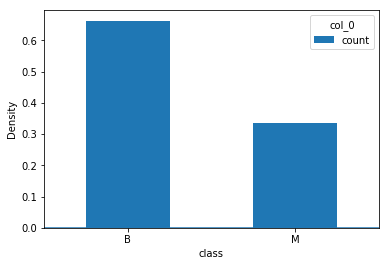

In [63]:
# class distribution
class_table = pd.crosstab(cancer["class"], columns = "count")
class_table = class_table/class_table.sum()
class_table.plot(kind = "bar")
# 


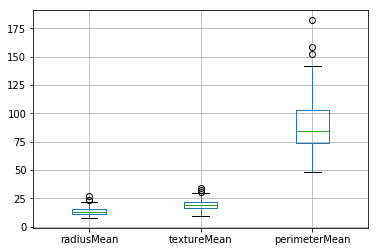

In [76]:
cancer.boxplot(header[2:5])

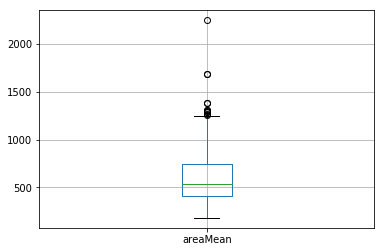

In [94]:
cancer.boxplot(header[5])

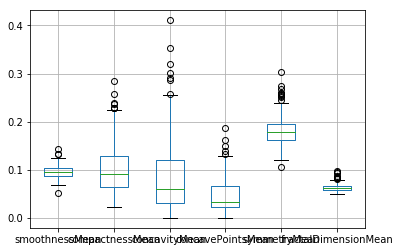

In [99]:
cancer.boxplot(header[6:12])

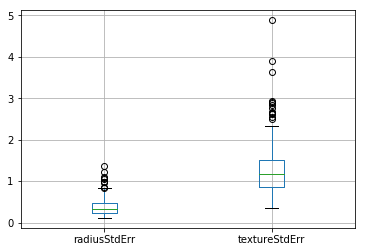

In [102]:
cancer.boxplot(header[12:14])